In [1]:
!pip install neattext
!pip install xgboost

In [2]:
# Import Packages

import joblib
# Exploratory Data Anaylsis (EDA) Packages
import pandas as pd
import numpy as np

# Visualization Packages 
import seaborn as sns
import matplotlib.pyplot as plt

# Text Cleaning
import neattext.functions as nfx

# Machine Learning Packages
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Importing all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
# Load the Data Set
df = pd.read_csv('../Data/emotion_dataset_raw.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang"


In [7]:
# Counting rows for Emotion column
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

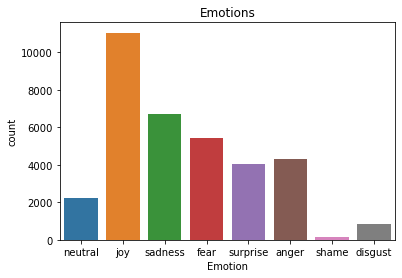

In [8]:
sns.countplot(x='Emotion', data=df)
plt.title('Emotions')
plt.show()

In [9]:
df.shape

(34792, 2)

In [10]:
df.drop_duplicates().shape

(31162, 2)

In [11]:
df = df.drop_duplicates()

In [12]:
df.shape

(31162, 2)

In [13]:
# Data Cleaning
print("Options for Data Cleaning: \n")
dir(nfx)

Options for Data Cleaning: 



['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [14]:
# Removing Stopwords
df['CleanText'] = df['Text'].apply(nfx.remove_stopwords)

In [15]:
# Remove Numbers
df['CleanText'] = df['CleanText'].apply(nfx.remove_numbers)

In [16]:
# Remove User Handles
df['CleanText'] = df['CleanText'].apply(nfx.remove_userhandles)

In [17]:
df.head()

,Emotion,Text,CleanText
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN I HATE FUNERALS THIS REALLY SHOWS ME HOW BLESSED I AM,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS SHOWS BLESSED
3,joy,"Such an eye ! The true hazel eye-and so brilliant ! Regular features , open countenance , with a complexion , Oh ! What a bloom of full health , and such a pretty height and size ; such a firm and upright figure ! There is health , not merely in her bloom , but in her air , her head , her glance . One hears sometimes of a child being ' the picture of health ' ; now , she always gives me the idea of being the complete picture of grown-up health . She is loveliness itself .","eye ! true hazel eye-and brilliant ! Regular features , open countenance , complexion , Oh ! bloom health , pretty height size ; firm upright figure ! health , merely bloom , air , head , glance . hears child ' picture health ' ; , gives idea complete picture grown-up health . loveliness ."
4,joy,"@Iluvmiasantos ugh babe.. hugggzzz for u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam at fil ko ang","ugh babe.. hugggzzz u .! babe naamazed nga ako e babe e, despite nega's mas pinaramdam fil ko ang"


In [18]:
df.tail()

,Emotion,Text,CleanText
34787,surprise,@MichelGW have you gift! Hope you like it! It's hand made and you can wear it ! It'll keep you warm! Lol,gift! Hope like it! hand wear ! It'll warm! Lol
34788,joy,The world didnt give it to me..so the world MOST DEFINITELY cnt take it away!!!,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YOU...","Youu JEALOUSY, #Losing YOU..."
34791,sadness,"I think about you baby, and I dream about you all the time","think baby, dream time"


In [19]:
class md:
  bold = '\033[1m'
  end = '\033[0m'

In [34]:
def buildModels(x_train, x_test, y_train, y_test):
    '''
    Lightweight script to test many models and find winners:param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = results = names = []
    
    models = [
      ('LGR', LogisticRegression()),
      ('RFC', RandomForestClassifier()),
      ('KNN', KNeighborsClassifier()),
      ('SVM', SVC(probability=True)),
      ('XGB', XGBClassifier()),
      ('ETC', ExtraTreesClassifier()),
      ('KMC', KMeans()),
      ('DTC', DecisionTreeClassifier()),
      ('RDC', RidgeClassifier()),
      ('ADA', AdaBoostClassifier())
    ]
    
    modelScore = []
    for model in models:
        print(md.bold + "========================================  " + model[0] + "  ========================================" + md.end)
        # Creating pipeline
        print(md.bold + "Creating Pipeline..." + md.end)
        pipeline = Pipeline(steps=[('cv', CountVectorizer()), model])
        
        # Training model
        print(md.bold + "Training Model..." + md.end)
        pipeline.fit(x_train, y_train)
        
        # Getting Results
        print(md.bold + "Data:" + md.end)
        print(pipeline.predict(["I am broke"]))
        # print(pipeline.predict_proba(["I am broke"]))
        Score = pipeline.score(x_test, y_test)
        print("Score:", Score)
        modelScore.append(Score)
        
        # Storing model
        print(md.bold + "Storing Model..." + md.end)
        with open(f"../Models/{model[0]}.pkl", "wb") as ec:
            joblib.dump(pipeline, ec)
        print(md.bold + "Process Complete!!\n\n\n" + md.end)
    print("Highest accuracy:", models[modelScore.index(max(modelScore))])

Target Variables = labels, y, dependent variable: Emotion column  
Feature - independent variables: Clean Text

In [21]:
# 20 % data will go for test data set and 80% will go for training
x_train, x_test, y_train, y_test = train_test_split(df['CleanText'], df['Emotion'], test_size=0.2, random_state=30)

In [35]:
buildModels(x_train, x_test, y_train, y_test)

========================================  KMC  ========================================
Creating Pipeline...
Training Model...
Data:
[2]
Score: -46842.797528443734
Storing Model...
Process Complete!!



========================================  DTC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.47280603240815017
Storing Model...
Process Complete!!



========================================  RDC  ========================================
Creating Pipeline...
Training Model...
Data:
['sadness']
Score: 0.5493341889940638
Storing Model...
Process Complete!!



========================================  ADA  ========================================
Creating Pipeline...
Training Model...
Data:
['joy']
Score: 0.34269212257339965
Storing Model...
Process Complete!!



Highest accuracy: ('RDC', RidgeClassifier())


In [22]:
pipeline_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [23]:
# Model Training
pipeline_lr.fit(x_train, y_train)

E:\Tools\Python\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [24]:
pipeline_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [25]:
example_sent = "I am happy"
pipeline_lr.predict([example_sent])

array(['joy'], dtype=object)

In [26]:
pipeline_lr.predict(['I am angry'])

array(['anger'], dtype=object)

In [27]:
pipeline_lr.predict(["I'll kill you"])

array(['sadness'], dtype=object)

In [28]:
pipeline_lr.predict_proba(["I'll kill you"])

array([[0.21783564, 0.00721881, 0.15636291, 0.18055834, 0.08646848,
        0.23782783, 0.00336349, 0.11036449]])

In [29]:
pipeline_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [30]:
pipeline_lr.score(x_test, y_test)

0.5801379752927964

In [31]:
with open ("../Models/emotion_classifier.pkl", 'wb') as modelFile:
  joblib.dump(pipeline_lr, modelFile)

FileNotFoundError: [Errno 2] No such file or directory: '/content/gdrive/My Drive/EmotionDetectionApp/Models/emotion_classifier.pkl'